In [103]:
%clear

In [104]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [105]:
# Total de unidades de produção para autoconsumo
drive.mount('/content/drive')
# df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/8-unidades-de-producao-para-autoconsumo.parquet')
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/8-unidades-de-producao-para-autoconsumo-novo.parquet')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  trimestre distrito                concelho               freguesia  \
0    2024T3    Braga  Vila Nova de Famalicão             Riba de Ave   
1    2024T3    Braga  Vila Nova de Famalicão             Riba de Ave   
2    2024T3    Braga  Vila Nova de Famalicão  Oliveira (Santa Maria)   
3    2024T3    Braga  Vila Nova de Famalicão     Vale (São Martinho)   
4    2024T3    Braga  Vila Nova de Famalicão   Oliveira (São Mateus)   

  codigo_postal tipo_de_tecnologia nivel_de_tensao  \
0          4765              Solar             BTE   
1          4765              Solar              MT   
2          4765              Solar              MT   
3          4770              Solar              MT   
4          4765              Solar              MT   

  escalao_de_potencia_instalada  numero_de_instalacoes  \
0                    ]30, 1000]                      1 

In [106]:
df1 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/8-unidades-de-producao-para-autoconsumo.parquet')
df1 = df1[df1['trimestre'].isin(['2022T2', '2022T3'])]
df1 = df1.rename(columns={'freguesias': 'freguesia', 'coddistritoconcelho': 'codconcelho', 'coddistritoconcelhofreguesia': 'codfreguesia', 'potencia_total_instalada_upac_kw':  'potencia_instalada_upac_kw'})

In [107]:
unique_trimesters = df['trimestre'].unique()
unique_trimesters.sort()
print(unique_trimesters)

['2022T4' '2023T1' '2023T2' '2023T3' '2023T4' '2024T1' '2024T2' '2024T3'
 '2024T4' '2025T1' '2025T2']


In [108]:
unique_trimesters = df1['trimestre'].unique()
unique_trimesters.sort()
print(unique_trimesters)

['2022T2' '2022T3']


In [109]:
print("Features in df:")
print(df.columns)

print("\nFeatures in df1:")
print(df1.columns)

Features in df:
Index(['trimestre', 'distrito', 'concelho', 'freguesia', 'codigo_postal',
       'tipo_de_tecnologia', 'nivel_de_tensao',
       'escalao_de_potencia_instalada', 'numero_de_instalacoes',
       'potencia_instalada_upac_kw', 'coddistrito', 'codconcelho',
       'codfreguesia', 'cpes', 'relacao_instalacoes_por_cpe',
       'relacao_potencia_por_cpe'],
      dtype='object')

Features in df1:
Index(['trimestre', 'distrito', 'concelho', 'freguesia',
       'escalao_de_potencia_instalada', 'numero_de_instalacoes',
       'potencia_instalada_upac_kw', 'coddistrito', 'codconcelho',
       'codfreguesia'],
      dtype='object')


In [110]:
# Concatenate df and df1
combined_df = pd.concat([df, df1], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Check the unique trimesters in the combined dataframe to confirm the data is merged
print("\nUnique trimesters in combined_df:")
print(combined_df['trimestre'].unique())

,trimestre,distrito,concelho,freguesia,codigo_postal,tipo_de_tecnologia,nivel_de_tensao,escalao_de_potencia_instalada,numero_de_instalacoes,potencia_instalada_upac_kw,coddistrito,codconcelho,codfreguesia,cpes,relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,BTE,"]30, 1000]",1,40.0,03,0312,031234,57414.0,0.000017,0.000697
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,MT,"]30, 1000]",3,463.0,03,0312,031234,57414.0,0.000052,0.008064
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),4765,Solar,MT,"]30, 1000]",2,169.6,03,0312,031239,57414.0,0.000035,0.002954
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),4770,Solar,MT,"]30, 1000]",1,136.0,03,0312,031241,57414.0,0.000017,0.002369
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),4765,Solar,MT,"]30, 1000]",2,1720.0,03,0312,031242,57414.0,0.000035,0.029958



Unique trimesters in combined_df:
['2024T3' '2024T4' '2024T2' '2023T2' '2023T3' '2022T4' '2023T1' '2025T1'
 '2025T2' '2023T4' '2024T1' '2022T3' '2022T2']


In [111]:
df = combined_df

In [112]:
# Convert the DataFrame to an Excel file
# df.to_excel('output.xlsx', index=False) # Save the file as 'output.xlsx' and don't include the index in the output.

# Cleaning

In [113]:
unique_escaloes = df['escalao_de_potencia_instalada'].unique()

print(unique_escaloes)

[']30, 1000]' ']4, 20.7]' ']0, 4]' '>1000' ']20.7, 30]' 'ND' ']4,20.7]'
 ']0,4]' ']20.7,30]' ']30,1000]']


In [114]:
escalao_counts = df['escalao_de_potencia_instalada'].value_counts()

# Display the counts
print(escalao_counts)

escalao_de_potencia_instalada
]0, 4]        43265
]4, 20.7]     36231
]30, 1000]    22699
]20.7, 30]    18950
]0,4]          5475
]4,20.7]       2864
]30,1000]      1987
]20.7,30]      1321
>1000           157
ND               10
Name: count, dtype: int64


In [115]:
replacement_map = {
    '> 1000': '>1000',
    ']0,4]': ']0, 4]',
    ']4,20.7]': ']4, 20.7]',
    ']20.7,30]': ']20.7, 30]',
    ']30,1000]': ']30, 1000]'
}
df['escalao_de_potencia_instalada'] = df['escalao_de_potencia_instalada'].replace(replacement_map)
df = df[df['escalao_de_potencia_instalada'] != 'ND']
df['escalao_de_potencia_instalada'].value_counts()

,count
escalao_de_potencia_instalada,
"]0, 4]",48740
"]4, 20.7]",39095
"]30, 1000]",24686
"]20.7, 30]",20271
>1000,157


In [116]:
desired_order = [']0, 4]',']4, 20.7]', ']20.7, 30]',']30, 1000]', '>1000']

# Geo

In [117]:
unique_distrito_count = df['distrito'].nunique()

# Print the result
print(f"There are {unique_distrito_count} unique districts.")
# Group by 'distrito' and count the occurrences
distrito_counts = df.groupby('distrito')['distrito'].count()

# Display the results
distrito_counts

There are 18 unique districts.


,distrito
distrito,
Aveiro,9631
Beja,3802
Braga,17173
Bragança,5122
Castelo Branco,4248
Coimbra,6930
Faro,4802
Guarda,5884
Leiria,7365


In [118]:
concelho_counts = df.groupby('concelho')['concelho'].count()

# Display the result.
concelho_counts

,concelho
concelho,
Abrantes,612
Aguiar da Beira,359
Alandroal,198
Albergaria-a-Velha,372
Albufeira,364
...,...
Vouzela,399
Águeda,826
Évora,834


In [119]:
freguesia_count = df.groupby('freguesia')['freguesia'].count()

# freguesia_count.count()
freguesia_count

,freguesia
freguesia,
A dos Cunhados e Maceira,113
A dos Francos,46
A dos Negros,42
"AVer-o-Mar, Amorim e Terroso",151
Abade de Neiva,60
...,...
"Évora (São Mamede, Sé, São Pedro e Santo Antão)",25
Évora Monte (Santa Maria),37
Évora de Alcobaça,88


# Visão geral

In [120]:
trimestre_rows = df.groupby('trimestre').size()
# trimestre_rows

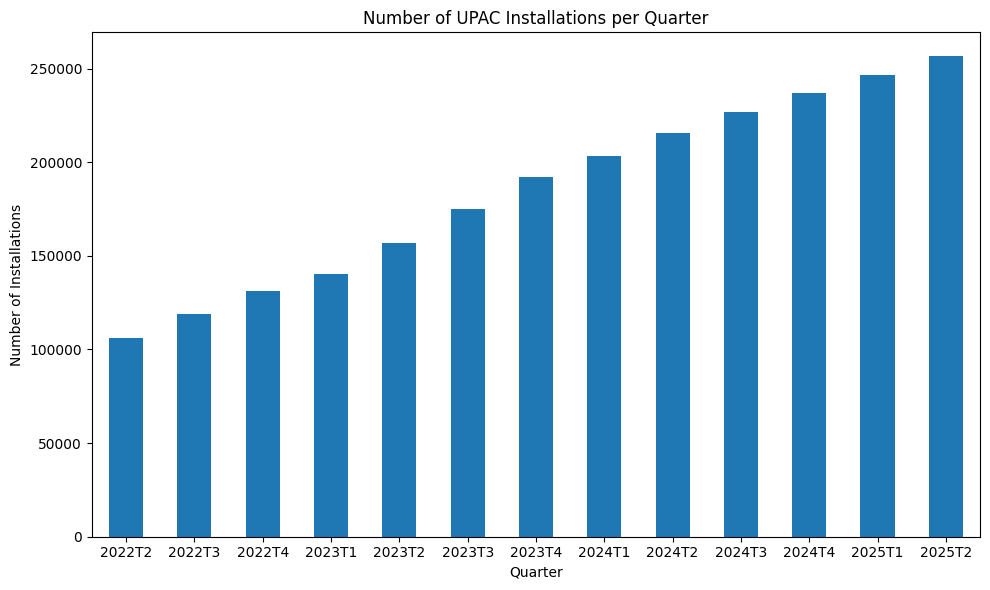

In [121]:
trimestre_counts = df.groupby('trimestre')['numero_de_instalacoes'].sum()
# trimestre_counts
trimestre_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of UPAC Installations per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Installations')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.tight_layout()
plt.show()

In [122]:
trimestre_counts_by_potencia = df.groupby(['trimestre', 'escalao_de_potencia_instalada'])['numero_de_instalacoes'].sum().reset_index()
# trimestre_counts_by_potencia

In [123]:
existing_escaloes = df['escalao_de_potencia_instalada'].unique()
existing_escaloes

array([']30, 1000]', ']4, 20.7]', ']0, 4]', '>1000', ']20.7, 30]'],
      dtype=object)

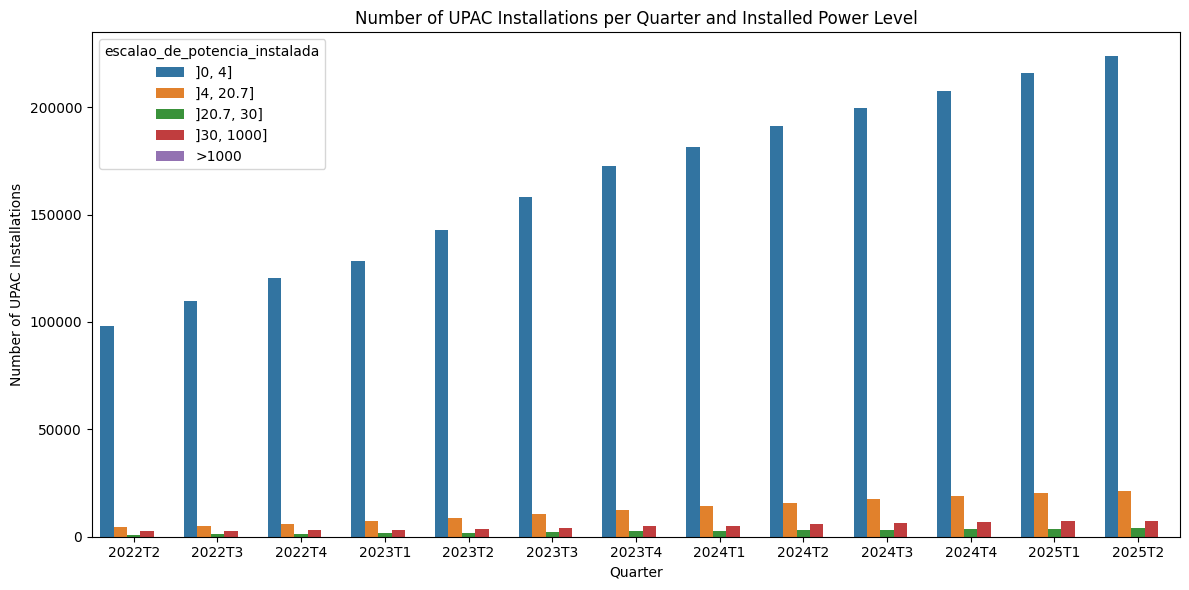

In [124]:
plt.figure(figsize=(12, 6))
sns.barplot(x='trimestre', y='numero_de_instalacoes',
            hue='escalao_de_potencia_instalada',
            hue_order=desired_order,
            data=trimestre_counts_by_potencia)

plt.title('Number of UPAC Installations per Quarter and Installed Power Level')
plt.xlabel('Quarter')
plt.ylabel('Number of UPAC Installations')


plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

In [125]:
# plot_data = df.groupby('escalao_de_potencia_instalada')['numero_de_instalacoes'].sum()

# plt.figure(figsize=(10, 6))
# plot_data.plot(kind='bar')

# plt.xlabel('Escalão de Potência Instalada')
# plt.ylabel('Número de Instalações')
# plt.title('Número de Instalações por Escalão de Potência Instalada')

# plt.xticks(rotation=45, ha='right')

# plt.tight_layout()
# plt.show()

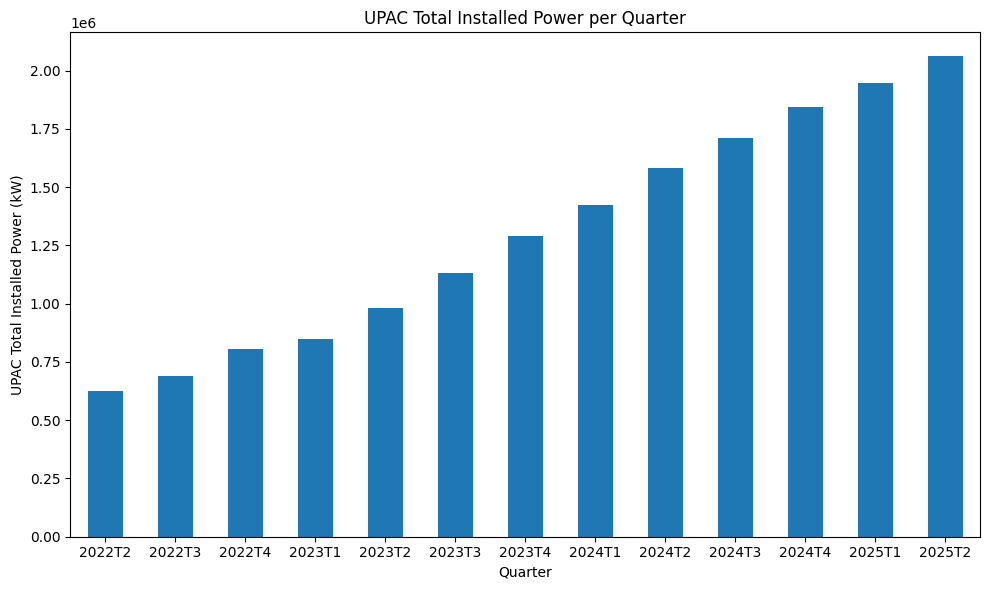

In [126]:
potencia_total_instalada_upac_kw_counts = df.groupby('trimestre')['potencia_instalada_upac_kw'].sum()

potencia_total_instalada_upac_kw_counts.plot(kind='bar', figsize=(10, 6))

plt.title('UPAC Total Installed Power per Quarter')
plt.xlabel('Quarter')
plt.ylabel('UPAC Total Installed Power (kW)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.tight_layout()
plt.show()

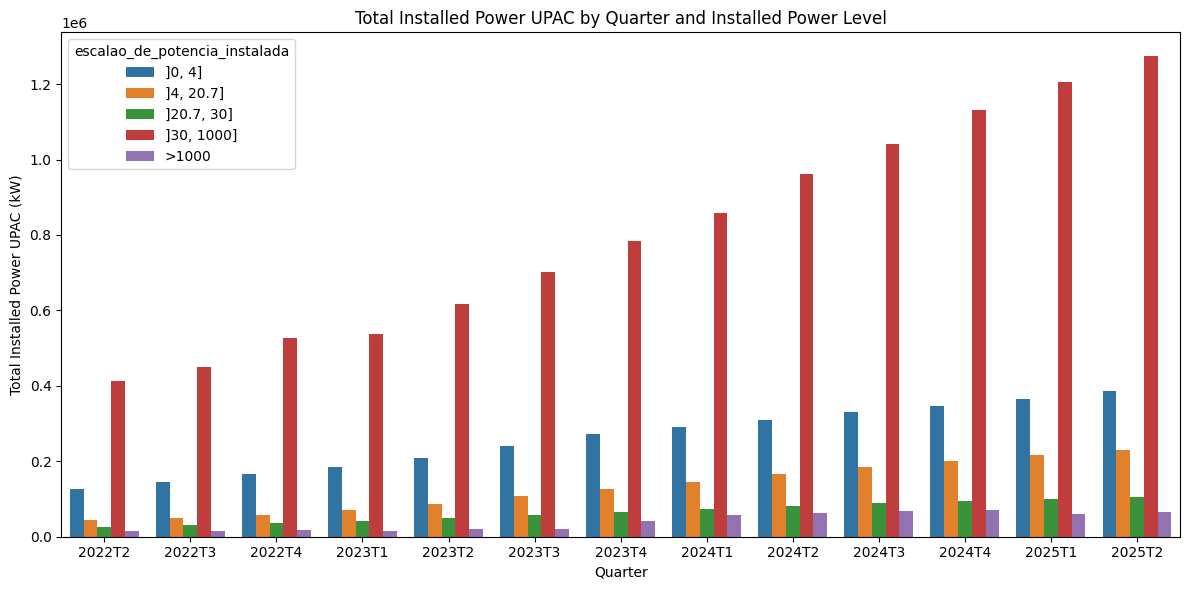

In [127]:
# Calculate the total installed power per trimester and 'escalao_de_potencia_instalada'
trimestre_potencia_by_escalao = df.groupby(['trimestre', 'escalao_de_potencia_instalada'])['potencia_instalada_upac_kw'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='trimestre', y='potencia_instalada_upac_kw',
            hue='escalao_de_potencia_instalada',
            hue_order=desired_order,
            # dodge=False,
            data=trimestre_potencia_by_escalao)

# Set plot labels and title
plt.title('Total Installed Power UPAC by Quarter and Installed Power Level')
plt.xlabel('Quarter')
plt.ylabel('Total Installed Power UPAC (kW)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# work


In [128]:
shapefile = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/cont-aad-caop2017/Cont_AAD_CAOP2017.shp")
shapefile2 = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/concelhos-shapefile/concelhos.shp")

In [129]:
shapefile

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.12 -287903.523, -15487.725 -2..."
3,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.56 -287893.679, -15521.65 -28..."
4,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."
...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714..."
3219,160323,União das freguesias de Vila e Roussas,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.2, -7426.438 271720..."
3220,160322,União das freguesias de Prado e Remoães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.16 272..."
3221,160320,União das freguesias de Chaviães e Paços,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717..."


In [130]:
df = df.merge(shapefile, left_on='codfreguesia', right_on='Dicofre', how='left')

In [131]:
df = df.drop(['Dicofre', 'Freguesia', 'Concelho', 'Distrito', 'TAA', 'AREA_EA_Ha', 'AREA_T_Ha', 'Des_Simpli'], axis=1, errors='ignore')


In [132]:
df

,trimestre,distrito,concelho,freguesia,codigo_postal,tipo_de_tecnologia,nivel_de_tensao,escalao_de_potencia_instalada,numero_de_instalacoes,potencia_instalada_upac_kw,coddistrito,codconcelho,codfreguesia,cpes,relacao_instalacoes_por_cpe,relacao_potencia_por_cpe,geometry
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,BTE,"]30, 1000]",1,40.00,03,0312,031234,57414.0,0.000017,0.000697,"POLYGON ((-20637.65 191881.996, -20628.049 191..."
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,MT,"]30, 1000]",3,463.00,03,0312,031234,57414.0,0.000052,0.008064,"POLYGON ((-20637.65 191881.996, -20628.049 191..."
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),4765,Solar,MT,"]30, 1000]",2,169.60,03,0312,031239,57414.0,0.000035,0.002954,"POLYGON ((-22117.206 194485.826, -22114.666 19..."
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),4770,Solar,MT,"]30, 1000]",1,136.00,03,0312,031241,57414.0,0.000017,0.002369,"POLYGON ((-27161.38 195931.816, -27197.298 195..."
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),4765,Solar,MT,"]30, 1000]",2,1720.00,03,0312,031242,57414.0,0.000035,0.029958,"POLYGON ((-23856.343 192759.108, -23832.103 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162351,2022T3,Braga,Vila Nova de Famalicão,Vermoim,NaN,NaN,NaN,"]4, 20.7]",2,12.12,03,0312,031247,NaN,NaN,NaN,"POLYGON ((-25976.586 196411.788, -25982.465 19..."
162352,2022T3,Braga,Vila Nova de Famalicão,Vila Nova de Famalicão e Calendário,NaN,NaN,NaN,"]4, 20.7]",15,153.57,03,0312,031260,NaN,NaN,NaN,"POLYGON ((-32373.588 195174.832, -32371.038 19..."
162353,2022T3,Guarda,Vila Nova de Foz Côa,Almendra,NaN,NaN,NaN,"]0, 4]",5,2.50,09,0914,091401,NaN,NaN,NaN,"POLYGON ((95730.137 152175.506, 95762.159 1520..."
162354,2022T3,Guarda,Vila Nova de Foz Côa,Sebadelhe,NaN,NaN,NaN,"]0, 4]",3,2.80,09,0914,091414,NaN,NaN,NaN,"POLYGON ((74201.592 154203.847, 74004.068 1536..."


In [133]:
# unique_trims = gdf["trimestre"].unique()
# unique_trims.sort()
# unique_trims

In [134]:
import matplotlib.pyplot as plt
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=df["geometry"])


# Get unique trimesters
unique_trims = gdf["trimestre"].unique()

# Set up the figure and axes for subplots
num_cols = 2  # Number of columns for subplots (adjust as needed)
num_rows = (len(unique_trims) + num_cols - 1) // num_cols  # Calculate number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop through unique trimesters and plot each map
for i, trim in enumerate(unique_trims):
    gdf_trim = gdf[gdf["trimestre"] == trim]

    gdf_trim.plot(
        column="numero_de_instalacoes",
        cmap="OrRd",
        legend=True,
        edgecolor="black",
        linewidth=0.5,
        ax=axes[i],  # Plot on the corresponding subplot
    )

    axes[i].set_title(f"Numero de Instalações - {trim}")

# Hide any unused subplots
for j in range(len(unique_trims), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Output hidden; open in https://colab.research.google.com to view.

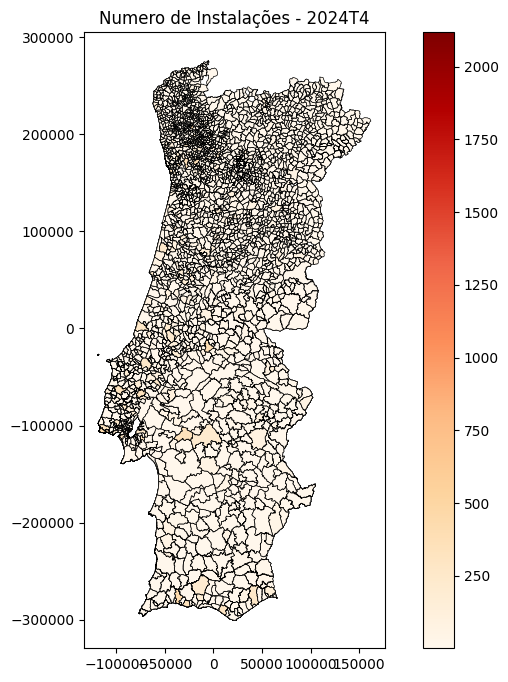

In [135]:
gdf = gpd.GeoDataFrame(df, geometry=df["geometry"])

selected_trim = "2024T4"
gdf_trim = gdf[gdf["trimestre"] == selected_trim]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_trim.plot(column="numero_de_instalacoes", cmap="OrRd", legend=True,
              edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Numero de Instalações - {selected_trim}")
plt.show()

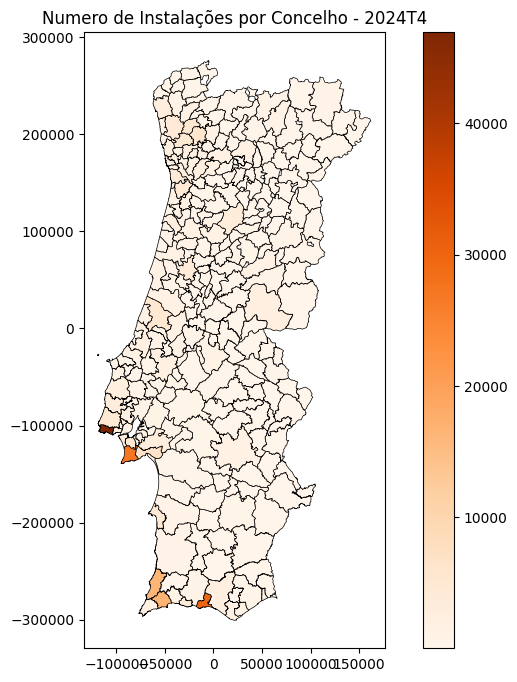

In [136]:
gdf_concelho = gdf_trim.dissolve(by="concelho", aggfunc={"numero_de_instalacoes": "sum"})

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_concelho.plot(column="numero_de_instalacoes", cmap="Oranges", legend=True,
                   edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Numero de Instalações por Concelho - {selected_trim}")
plt.show()

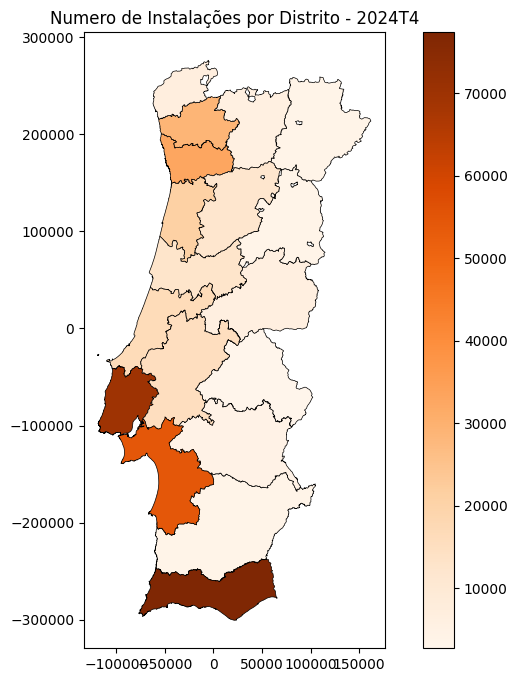

In [137]:
gdf_distrito = gdf_trim.dissolve(by="coddistrito", aggfunc={"numero_de_instalacoes": "sum"})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_distrito.plot(column="numero_de_instalacoes", cmap="Oranges", legend=True,
                   edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Numero de Instalações por Distrito - {selected_trim}")
plt.show()

In [138]:
# gdf = gpd.GeoDataFrame(df, geometry=df["geometry"])

# selected_trim = "2024T4"
# gdf_trim = gdf[gdf["trimestre"] == selected_trim]

# gdf_trim["normalized_instalacoes"] = (gdf_trim["numero_de_instalacoes"] - gdf_trim["numero_de_instalacoes"].min()) / (gdf_trim["numero_de_instalacoes"].max() - gdf_trim["numero_de_instalacoes"].min())

# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# gdf_trim.plot(column="normalized_instalacoes", cmap="OrRd", legend=True,
#               edgecolor="black", linewidth=0.5, ax=ax)

# ax.set_title(f"Numero de Instalações (Normalized) - {selected_trim}")
# plt.show()

In [139]:
# # Create the Altair chart
# alt.Chart(df_2023T3).mark_geoshape().encode(
#     color='numero_de_instalacoes:Q'
# ).properties(
#     width=600,
#     height=400
# ).project(
#     type="albersUsa"
# )

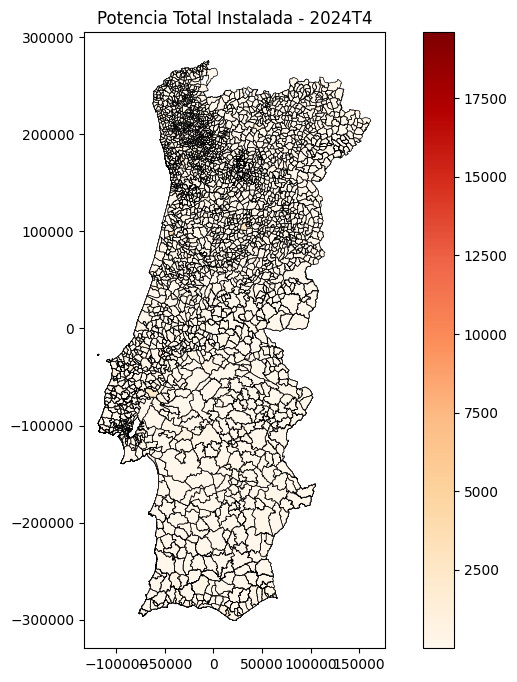

In [140]:
gdf = gpd.GeoDataFrame(df, geometry=df["geometry"])

selected_trim = "2024T4"
gdf_trim = gdf[gdf["trimestre"] == selected_trim]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_trim.plot(column="potencia_instalada_upac_kw", cmap="OrRd", legend=True,
              edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Potencia Total Instalada - {selected_trim}")
plt.show()

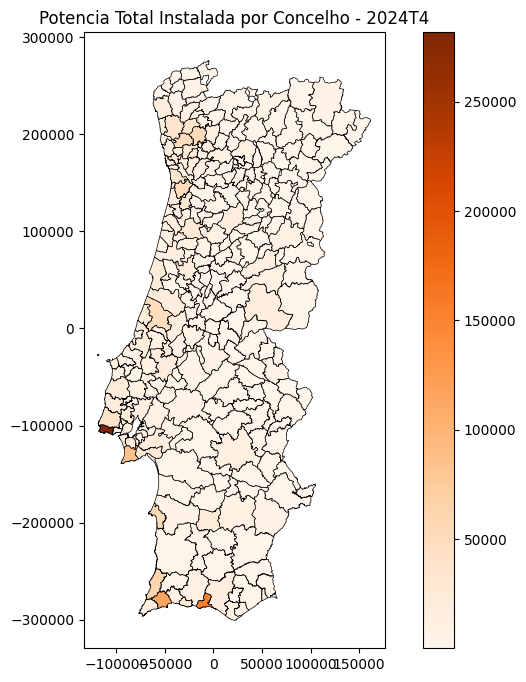

In [141]:
gdf_concelho = gdf_trim.dissolve(by="concelho", aggfunc={"potencia_instalada_upac_kw": "sum"})

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_concelho.plot(column="potencia_instalada_upac_kw", cmap="Oranges", legend=True,
                   edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Potencia Total Instalada por Concelho - {selected_trim}")
plt.show()

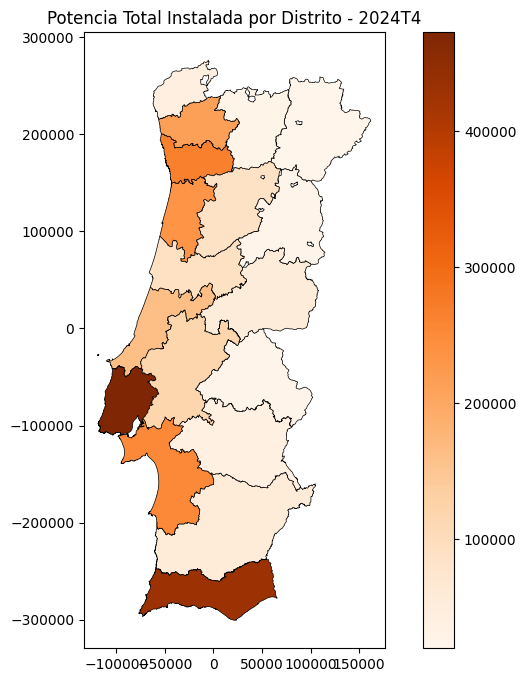

In [142]:
gdf_distrito = gdf_trim.dissolve(by="coddistrito", aggfunc={"potencia_instalada_upac_kw": "sum"})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_distrito.plot(column="potencia_instalada_upac_kw", cmap="Oranges", legend=True,
                   edgecolor="black", linewidth=0.5, ax=ax)

ax.set_title(f"Potencia Total Instalada por Distrito - {selected_trim}")
plt.show()

In [143]:
# gdf = gpd.GeoDataFrame(df, geometry=df["geometry"])

# selected_trim = "2024T4"
# gdf_trim = gdf[gdf["trimestre"] == selected_trim]

# gdf_trim["normalized_potencia"] = (gdf_trim["potencia_total_instalada_upac_kw"] - gdf_trim["potencia_total_instalada_upac_kw"].min()) / (gdf_trim["potencia_total_instalada_upac_kw"].max() - gdf_trim["potencia_total_instalada_upac_kw"].min())

# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# gdf_trim.plot(column="normalized_potencia", cmap="OrRd", legend=True,
#               edgecolor="black", linewidth=0.5, ax=ax)

# ax.set_title(f"Potencia Total Instalada (Normalized) - {selected_trim}")
# plt.show()

# NUTS3

In [144]:
# shapefile_nuts = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/NUTS_RG_20M_2024_3035.shp/NUTS_RG_20M_2024_3035.shp")
shapefile_nuts = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/NUTS_RG_01M_2024_3035.shp/NUTS_RG_01M_2024_3035.shp")
shapefile_nuts = shapefile_nuts[shapefile_nuts['CNTR_CODE'] == 'PT'].reset_index(drop=True)
shapefile_nuts = shapefile_nuts[shapefile_nuts['LEVL_CODE'] == 3].reset_index(drop=True)
shapefile_nuts = shapefile_nuts[~shapefile_nuts['NUTS_ID'].isin(['PT200', 'PT300'])]

In [145]:
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

desired_crs = CRS("EPSG:4326")
final_nuts = shapefile_nuts.to_crs(desired_crs)

In [146]:
final_nuts

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
1,PT196,3,PT,Beiras e Serra da Estrela,Beiras e Serra da Estrela,1.0,3.0,NaN,"MULTIPOLYGON (((-7.16854 41.01304, -7.16812 41..."
2,PT1A0,3,PT,Grande Lisboa,Grande Lisboa,NaN,1.0,1.0,"MULTIPOLYGON (((-9.38502 39.05988, -9.37591 39..."
3,PT1B0,3,PT,Península de Setúbal,Península de Setúbal,NaN,1.0,1.0,"MULTIPOLYGON (((-8.6595 38.81372, -8.64762 38...."
4,PT1C1,3,PT,Alentejo Litoral,Alentejo Litoral,NaN,3.0,1.0,"MULTIPOLYGON (((-8.60021 38.54689, -8.5891 38...."
5,PT1C2,3,PT,Baixo Alentejo,Baixo Alentejo,NaN,3.0,NaN,"POLYGON ((-7.27813 38.32044, -7.26491 38.30552..."
6,PT1C3,3,PT,Alto Alentejo,Alto Alentejo,NaN,3.0,NaN,"POLYGON ((-7.53607 39.66143, -7.53057 39.65618..."
7,PT1C4,3,PT,Alentejo Central,Alentejo Central,NaN,3.0,NaN,"POLYGON ((-8.14579 39.02045, -8.1382 39.01253,..."
8,PT1D1,3,PT,Oeste,Oeste,NaN,3.0,1.0,"MULTIPOLYGON (((-9.04026 39.74142, -8.9955 39...."
9,PT1D2,3,PT,Médio Tejo,Médio Tejo,NaN,3.0,NaN,"POLYGON ((-8.47398 39.82166, -8.46361 39.80139..."
10,PT1D3,3,PT,Lezíria do Tejo,Lezíria do Tejo,NaN,3.0,1.0,"POLYGON ((-8.75941 39.47577, -8.75219 39.46297..."


<Axes: >

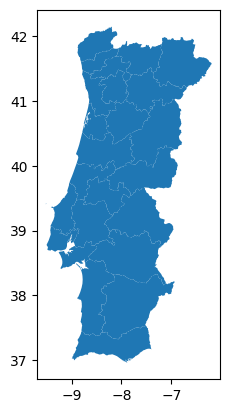

In [147]:
final_nuts.plot()

In [148]:
conversion_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tese/EU-27-LAU-2024-NUTS-2024.xlsx', sheet_name="PT")
columns_to_keep = ['NUTS 3 CODE', 'LAU CODE']
conversion_df = conversion_df[columns_to_keep]
conversion_df = conversion_df.rename(columns={'LAU CODE': 'codfreguesia'})
conversion_df

,NUTS 3 CODE,codfreguesia
0,PT111,160101
1,PT111,160102
2,PT111,160104
3,PT111,160105
4,PT111,160106
...,...,...
3087,PT300,310906
3088,PT300,311001
3089,PT300,311002
3090,PT300,311003


In [149]:
merged_df = pd.merge(df, conversion_df, on='codfreguesia', how='left')
merged_df = merged_df[['trimestre', 'escalao_de_potencia_instalada', 'numero_de_instalacoes', 'potencia_instalada_upac_kw', 'NUTS 3 CODE']]
merged_df = merged_df.rename(columns={'NUTS 3 CODE': 'NUTS_ID'})
merged_df = merged_df.merge(final_nuts, on='NUTS_ID', how='left')
columns_to_keep = ['trimestre', 'escalao_de_potencia_instalada', 'numero_de_instalacoes', 'potencia_instalada_upac_kw', 'NUTS_ID','geometry']
merged_df = merged_df[columns_to_keep]
merged_df

,trimestre,escalao_de_potencia_instalada,numero_de_instalacoes,potencia_instalada_upac_kw,NUTS_ID,geometry
0,2024T3,"]30, 1000]",1,40.00,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
1,2024T3,"]30, 1000]",3,463.00,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
2,2024T3,"]30, 1000]",2,169.60,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
3,2024T3,"]30, 1000]",1,136.00,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
4,2024T3,"]30, 1000]",2,1720.00,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
...,...,...,...,...,...,...
162351,2022T3,"]4, 20.7]",2,12.12,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
162352,2022T3,"]4, 20.7]",15,153.57,PT119,"POLYGON ((-8.02114 41.69395, -8.01807 41.69003..."
162353,2022T3,"]0, 4]",5,2.50,PT11D,"POLYGON ((-7.39989 41.50075, -7.39274 41.49555..."
162354,2022T3,"]0, 4]",3,2.80,PT11D,"POLYGON ((-7.39989 41.50075, -7.39274 41.49555..."


In [150]:
gdf = gpd.GeoDataFrame(merged_df, geometry=merged_df["geometry"])

In [151]:
selected_trim = "2024T4"
gdf_trim = gdf[gdf["trimestre"] == selected_trim]
gdf_trim

,trimestre,escalao_de_potencia_instalada,numero_de_instalacoes,potencia_instalada_upac_kw,NUTS_ID,geometry
2201,2024T4,"]0, 4]",1,1.00,PT191,"MULTIPOLYGON (((-8.57152 40.87547, -8.55361 40..."
2202,2024T4,"]0, 4]",207,347.87,PT191,"MULTIPOLYGON (((-8.57152 40.87547, -8.55361 40..."
2203,2024T4,"]0, 4]",123,204.56,PT191,"MULTIPOLYGON (((-8.57152 40.87547, -8.55361 40..."
2204,2024T4,"]0, 4]",138,203.50,PT191,"MULTIPOLYGON (((-8.57152 40.87547, -8.55361 40..."
2205,2024T4,"]0, 4]",1,1.50,PT191,"MULTIPOLYGON (((-8.57152 40.87547, -8.55361 40..."
...,...,...,...,...,...,...
115396,2024T4,"]20.7, 30]",1,30.00,PT193,"POLYGON ((-8.14366 40.06338, -8.15089 40.04129..."
115397,2024T4,"]20.7, 30]",2,55.00,PT1D1,"MULTIPOLYGON (((-9.04026 39.74142, -8.9955 39...."
115398,2024T4,"]20.7, 30]",1,27.50,PT1D1,"MULTIPOLYGON (((-9.04026 39.74142, -8.9955 39...."
115399,2024T4,"]20.7, 30]",1,25.00,PT1D1,"MULTIPOLYGON (((-9.04026 39.74142, -8.9955 39...."


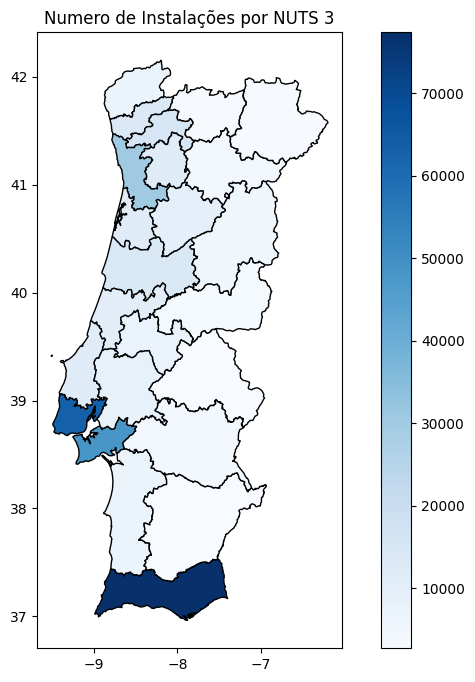

In [152]:
gdf_grouped = gdf_trim.dissolve(by="NUTS_ID", aggfunc={"numero_de_instalacoes": "sum"})

fig, ax = plt.subplots(figsize=(10, 8))
gdf_grouped.plot(column='numero_de_instalacoes', cmap='Blues', edgecolor='black', legend=True, ax=ax)

ax.set_title('Numero de Instalações por NUTS 3')
plt.show()

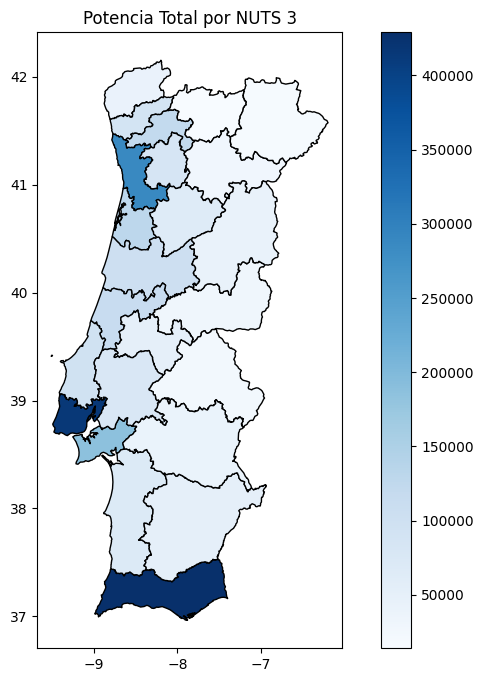

In [153]:
gdf_grouped = gdf_trim.dissolve(by="NUTS_ID", aggfunc={"potencia_instalada_upac_kw": "sum"})

fig, ax = plt.subplots(figsize=(10, 8))
gdf_grouped.plot(column='potencia_instalada_upac_kw', cmap='Blues', edgecolor='black', legend=True, ax=ax)

ax.set_title('Potencia Total por NUTS 3')
plt.show()

# Para terminar
outro notebook

In [154]:
# def _plot_series(series, series_name, series_index=0):
#   palette = list(sns.palettes.mpl_palette('Dark2'))
#   xs = series['index']
#   ys = series['numero_de_instalacoes']

#   plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_6.sort_values('index', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('escalao_de_potencia_instalada')):
#   _plot_series(series, series_name, i)
#   fig.legend(title='escalao_de_potencia_instalada', bbox_to_anchor=(1, 1), loc='upper left')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('index')
# _ = plt.ylabel('numero_de_instalacoes')

In [155]:
# df.plot(kind='scatter', x='numero_de_instalacoes', y='potencia_total_instalada_upac_kw', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [156]:
# correlation = df['numero_de_instalacoes'].corr(df['potencia_total_instalada_upac_kw'])

# # Print the correlation coefficient
# print(f"Correlation between numero_de_instalacoes and potencia_total_instalada_upac_kw: {correlation}")

# # Create a scatter plot to visualize the relationship
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='numero_de_instalacoes', y='potencia_total_instalada_upac_kw', data=df)
# plt.title('Correlation between Number of Installations and Total Installed Power')
# plt.xlabel('Number of Installations')
# plt.ylabel('Total Installed Power (kW)')
# plt.show()

# # Create a heatmap to visualize the correlation matrix
# correlation_matrix = df[['numero_de_instalacoes', 'potencia_total_instalada_upac_kw']].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


In [157]:
# test = df.sort_values('numero_de_instalacoes', ascending=False)
# test